# Чтение датасета и предобработка

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
# загружаем данные из csv файла
df = pd.read_csv(r"C:\Users\Admin\Jupyter\zakupki\fz_dataset.csv",  on_bad_lines='skip', low_memory=False, sep=';') 
print("Размерность датасета", df.shape)
print("Названия колонок", df.columns)
# просмотр 4 первых строк данных
df.head(4)

Размерность датасета (6698500, 5)
Названия колонок Index(['id', 'subject', 'okpd_code', 'cost', 'execution_period'], dtype='object')


,id,subject,okpd_code,cost,execution_period
0,25406934,Оказание услуг по техническому обслуживанию ли...,43.2,"507857,28",353
1,25407858,Выполнение работ по ремонту автомобильной доро...,42.1,87323900,628
2,25407870,Выполнение работ по ремонту автомобильной доро...,42.1,98847500,280
3,25407874,Выполнение работ по ремонту автомобильной доро...,42.1,13596800,625


In [3]:
df.dtypes

id                    int64
subject              object
okpd_code           float64
cost                 object
execution_period      int64
dtype: object

In [4]:
df['subject']  = df['subject'].astype('string')
df['okpd_code']  = df['okpd_code'].astype('string')
df['okpd_code']  = df['okpd_code'].apply(lambda x: x.strip())
df['cost']  = df['cost'].apply(lambda x: x.replace(',', '.')).astype('float64')
df.dtypes

id                           int64
subject             string[python]
okpd_code                   object
cost                       float64
execution_period             int64
dtype: object

In [5]:
# информация о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6698500 entries, 0 to 6698499
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   id                int64  
 1   subject           string 
 2   okpd_code         object 
 3   cost              float64
 4   execution_period  int64  
dtypes: float64(1), int64(2), object(1), string(1)
memory usage: 255.5+ MB


In [6]:
df.describe()

,id,cost,execution_period
count,6.698500e+06,6.698500e+06,6.698500e+06
mean,1.700324e+07,4.112227e+06,2.072208e+02
std,1.037821e+07,1.414076e+08,9.770082e+02
min,4.000000e+00,1.000000e-02,1.000000e+00
25%,7.854543e+06,5.000000e+04,8.700000e+01
50%,1.620971e+07,1.867751e+05,1.830000e+02
75%,2.625731e+07,7.300000e+05,3.000000e+02
max,3.508404e+07,1.387754e+11,2.191350e+06


In [7]:
# анализ пропусков
df.isnull().sum()

id                  0
subject             5
okpd_code           0
cost                0
execution_period    0
dtype: int64

In [8]:
# Проверим на уникальные значения
df.nunique()

id                  6698500
subject             3277659
okpd_code               270
cost                4079023
execution_period       3057
dtype: int64

In [9]:
# проверка наличия дубликатов
df.duplicated().sum()

0

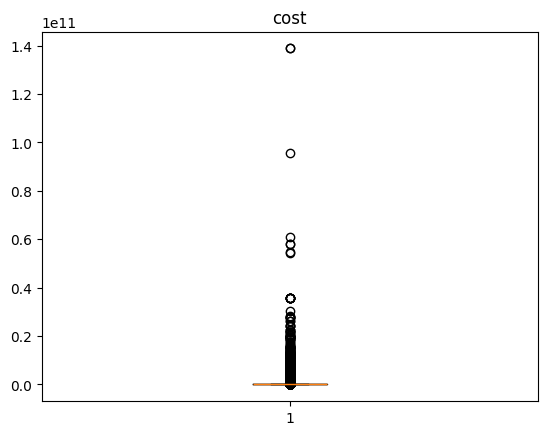

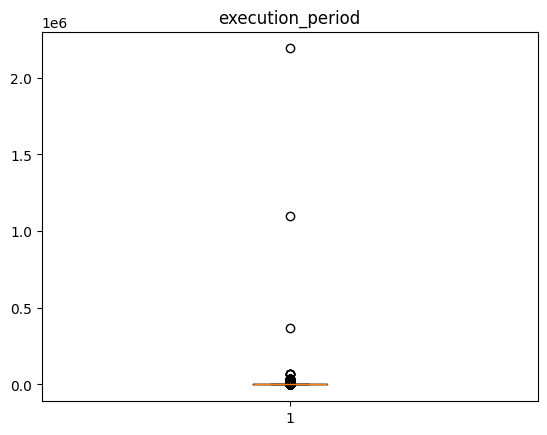

In [10]:
for col in ['cost', 'execution_period']:
    plt.boxplot(data=df, x=df[col])
    plt.title(col)
    plt.show()

In [11]:
df[df['cost'] > 2000000].sort_values(by='cost')

,id,subject,okpd_code,cost,execution_period
6520728,11705714,Выполнение работ по капитальному ремонту наруж...,42.2,2.000000e+06,140
6383704,3230286,Создание в муниципальном автономном общеобразо...,41.2,2.000000e+06,179
6055266,5105780,Приобретение в муниципальную собственность неж...,41.2,2.000000e+06,55
865707,32940444,Приобретение квартир в муниципальную собственн...,68.1,2.000000e+06,180
2535746,6961084,поставка электроэнергии для нужд БУЗ ВО Сомовс...,35.1,2.000000e+06,365
...,...,...,...,...,...
5986184,34988656,"Выполнение работ по проектированию, строительс...",42.1,5.821128e+10,1740
5987508,35069024,Выполнение работ по строительству объекта: Мос...,42.1,6.090000e+10,1424
88382,33155646,Строительство объекта «Терминал сжиженного при...,42.9,9.575316e+10,912
6607572,17164742,42.11.20.000 - Выполнение работ по строительс...,42.1,1.387754e+11,1141


In [12]:
df[df['execution_period'] > 7000].sort_values(by='execution_period')

,id,subject,okpd_code,cost,execution_period
584561,31211304,Аренда земельного участка по адресу: Свердловс...,68.3,388476.94,7304
6320300,22105560,"Выполнение действий (работ, мероприятий), напр...",71.1,765118.48,7305
6178777,12370808,"Выполнение действий (работ, мероприятий), напр...",71.1,3286636.53,7490
1351,25793810,Отчисления региональному оператору за проведен...,41.2,20567.04,10202
4477675,18642432,Поставка грудки куриной и бедра куриного на 20...,10.1,208797.89,11047
...,...,...,...,...,...
65638,32217634,Выполнение кадастровых работ по формированию д...,71.1,291026.43,65977
964739,33395812,Поставка электроэнергии,35.1,5110000.00,66050
92992,33351458,Выполнение работ по подготовке системы отоплен...,43.2,28712.32,365344
954123,33347844,Оказание услуг по информационному сопровождени...,62.0,242591.52,1096066


In [18]:
df = df[df['execution_period'] < 6500].sort_values(by='execution_period')

In [14]:
df.to_csv(r"C:\Users\Admin\Jupyter\zakupki\fz_dataset_clean.csv", sep=';', index=False)

### Корреляционный анализ

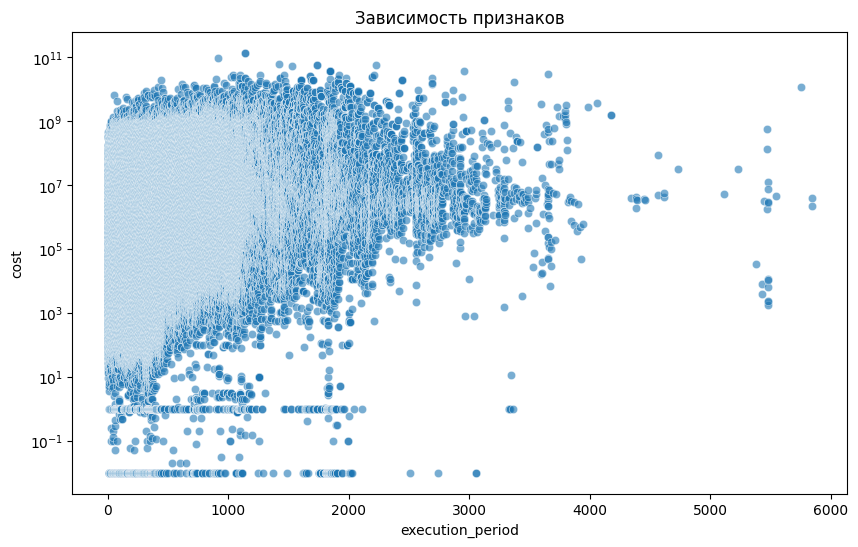

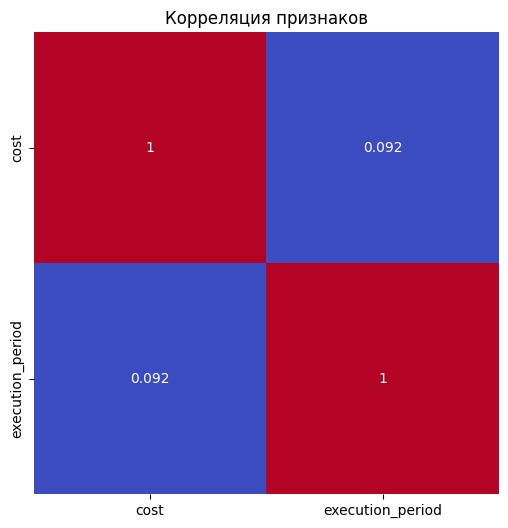

In [19]:
correlation = df[['cost', 'execution_period']].corr()


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='execution_period', y='cost', alpha=0.6)
plt.title('Зависимость признаков')
plt.yscale('log')
plt.show()

plt.figure(figsize=(6, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', cbar=False)
plt.title('Корреляция признаков')
plt.show()

Корреляция очень низкая

# NLP анализ

In [20]:
import warnings
warnings.filterwarnings('ignore')

По ОКПД-2 контракты в общем случае должны разделяться так:

0. Прочие
1. Строительно-монтажные работы (СМР) - 41, 42, 43(кроме нижеперечисленных)
2. Проектно-изыскательские работы (ПИР) - 41.1, 71.1
3. Подключение коммуникаций - 43.22
4. Строительный надзор – четкой группы нет. 

На основе анализа исходных данных к группе Строительный надзор относятся контракты с ОКПД-2 43.9, 42.9, 42.2


In [21]:
df = df.query('''okpd_code.str.contains("41.") or okpd_code.str.contains("42.") or okpd_code.str.contains("43.") or okpd_code == "71.1" ''', 
               engine='python')

Очистим описания услуг от латинских символов и чисел для дальнейшего анализа данных.

In [23]:
def clear_text(text):
    try:
        lst = [char for char in text if 1039 < ord(text[0])]
        return ''.join(lst)
    except Exception as ex:
        return ''

df['subject'] = df['subject'].apply(lambda x: clear_text(x))
df = df[df["subject"] != ""]
df['subject'].count()

949747

In [27]:
df.to_csv(r"C:\Users\Admin\Jupyter\zakupki\fz_dataset_filter.csv", sep=';', index=False)

In [28]:
import nltk

In [29]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
from nltk.corpus import stopwords
from string import punctuation

In [33]:
print(stopwords.words('russian'))
print(punctuation)

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

In [34]:
# Создаём список шума из стопслов и знаков пунктуации
noise = stopwords.words('russian') + list(punctuation)

In [36]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [38]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.


True

### Разбираем строки на токены, лематизируем и очищаем от стослов и знаков пунктуации

In [39]:
from nltk import download
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from collections import defaultdict, Counter
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords

tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

stemmer = nltk.stem.snowball.RussianStemmer()
word_lemmatized = WordNetLemmatizer()


class NLP:
  
  def __init__(self, __df):
     self.df = __df

  def tokening(self):
     self.df['data'] =  [word_tokenize(entry.lower()) for entry in self.df['subject']]

  def lammatize(self, word, tag):
     return word_lemmatized.lemmatize(word, tag_map[tag])

  def steming(self, word_final):
     return stemmer.stem(word_final)

  def fit(self): 
    self.tokening()
    for index, entry in zip(self.df["data"].index, self.df['data']):
        final_words = []
        for word, tag in pos_tag(entry):
            if word not in stopwords.words("russian") and word.isalpha():
                word_final = self.lammatize(word, tag[0])
                word_final = self.steming(word_final)
                final_words.append(word_final)
        self.df.loc[index, "data_final"] = str(final_words)
    return self.df

nlp = NLP(df)
vectors = nlp.fit()
vectors

,id,subject,okpd_code,cost,execution_period,data,data_final
7903,27206446,"приобретение нежилого здания, в целях осуществ...",41.2,18061000.00,1,"[приобретение, нежилого, здания, ,, в, целях, ...","['приобретен', 'нежил', 'здан', 'цел', 'осущес..."
6628218,18675346,Выполнение работ по ремонту подъездов по адрес...,41.2,1740653.57,1,"[выполнение, работ, по, ремонту, подъездов, по...","['выполнен', 'работ', 'ремонт', 'подъезд', 'ад..."
6676803,22454818,Содержание автомобильных дорог местного значен...,42.1,35528286.89,1,"[содержание, автомобильных, дорог, местного, з...","['содержан', 'автомобильн', 'дорог', 'местн', ..."
6313894,21437940,"Ремонт автомобильной дороги,ул.2-я Пятилетка (...",42.1,976423.82,1,"[ремонт, автомобильной, дороги, ,, ул.2-я, пят...","['ремонт', 'автомобильн', 'дорог', 'пятилетк',..."
6051818,4962120,Выполнение работ по ремонту коридора в здании ...,43.3,351157.02,1,"[выполнение, работ, по, ремонту, коридора, в, ...","['выполнен', 'работ', 'ремонт', 'коридор', 'зд..."
...,...,...,...,...,...,...,...
6463317,8299242,"Выполнение действий (работ, мероприятий),напра...",71.1,12690928.14,5479,"[выполнение, действий, (, работ, ,, мероприяти...","['выполнен', 'действ', 'работ', 'мероприят', '..."
6371115,19410874,"Выполнение действий (работ, мероприятий), напр...",71.1,7373200.66,5479,"[выполнение, действий, (, работ, ,, мероприяти...","['выполнен', 'действ', 'работ', 'мероприят', '..."
6284607,19411060,"Выполнение действий (работ, мероприятий), напр...",71.1,4558007.01,5542,"[выполнение, действий, (, работ, ,, мероприяти...","['выполнен', 'действ', 'работ', 'мероприят', '..."
6200696,13771484,"Выполнение действий (работ, мероприятий), напр...",71.1,2211492.00,5844,"[выполнение, действий, (, работ, ,, мероприяти...","['выполнен', 'действ', 'работ', 'мероприят', '..."


In [40]:
vectors.to_csv(r"C:\Users\Admin\Jupyter\zakupki\dataset_nlp_process.csv", sep=';', index=False)